In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
anime   = pd.read_csv('../data/anime_cleaned.csv')

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_columns = ['score', 'scored_by', 'rank', 'popularity', 'members', 'favorites', 'premiered_year']
anime[numeric_columns] = scaler.fit_transform(anime[numeric_columns])
anime.head()

,anime_id,title,type,source,duration,rating,score,scored_by,rank,popularity,...,genre_Shounen,genre_Slice of Life,genre_Space,genre_Sports,genre_Super Power,genre_Supernatural,genre_Thriller,genre_Vampire,genre_Yaoi,premiered_year
0,11013,Inu x Boku SS,5,6,1,2,1.017291,2.964256,-1.388863,-1.676562,...,0,0,0,0,0,0,0,0,0,0.573616
1,2104,Seto no Hanayome,5,6,1,2,1.195304,1.849785,-1.535933,-1.644179,...,0,0,0,0,0,0,0,0,0,0.189501
2,5262,Shugo Chara!! Doki,5,6,1,1,0.962517,0.595367,-1.325949,-1.450599,...,0,0,0,0,0,0,0,0,0,0.266324
3,721,Princess Tutu,5,9,2,2,1.414397,0.580799,-1.648857,-1.512247,...,0,0,0,0,0,0,0,0,0,-0.194614
4,12365,Bakuman. 3rd Season,5,6,1,2,1.729343,2.233949,-1.717956,-1.629786,...,0,0,0,0,0,0,0,0,0,0.573616


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
anime['type'] = le.fit_transform(anime['type'])
anime['duration'] = le.fit_transform(anime['duration'])
anime['rating'] = le.fit_transform(anime['rating'])
anime['studio'] = le.fit_transform(anime['studio'])
anime['source'] = le.fit_transform(anime['source'])
anime['anime_duration'] = le.fit_transform(anime['anime_duration'])
anime.head()

,anime_id,title,type,source,duration,rating,score,scored_by,rank,popularity,...,genre_Shounen,genre_Slice of Life,genre_Space,genre_Sports,genre_Super Power,genre_Supernatural,genre_Thriller,genre_Vampire,genre_Yaoi,premiered_year
0,11013,Inu x Boku SS,5,6,1,2,1.017291,2.964256,-1.388863,-1.676562,...,0,0,0,0,0,0,0,0,0,0.573616
1,2104,Seto no Hanayome,5,6,1,2,1.195304,1.849785,-1.535933,-1.644179,...,0,0,0,0,0,0,0,0,0,0.189501
2,5262,Shugo Chara!! Doki,5,6,1,1,0.962517,0.595367,-1.325949,-1.450599,...,0,0,0,0,0,0,0,0,0,0.266324
3,721,Princess Tutu,5,9,2,2,1.414397,0.580799,-1.648857,-1.512247,...,0,0,0,0,0,0,0,0,0,-0.194614
4,12365,Bakuman. 3rd Season,5,6,1,2,1.729343,2.233949,-1.717956,-1.629786,...,0,0,0,0,0,0,0,0,0,0.573616


In [5]:
y = anime['title']
X = anime.drop('title', axis=1)
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns, index=X.index)
X.head()
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca.head()


,PC1,PC2
0,-6359.895427,405.996315
1,-15268.725344,321.576951
2,-12110.082687,44.814657
3,-16651.675921,298.393660
4,-5007.653787,302.095794


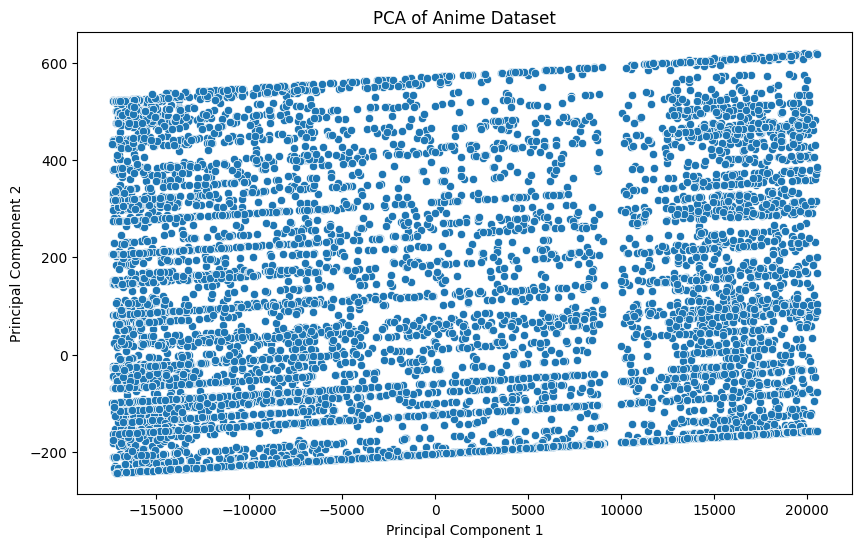

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=X_pca)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Anime Dataset')
plt.show()


In [7]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(X)
cosine_sim = pd.DataFrame(cosine_sim, index=y, columns=y)
cosine_sim.head()

title,Inu x Boku SS,Seto no Hanayome,Shugo Chara!! Doki,Princess Tutu,Bakuman. 3rd Season,Yume-iro Pâtissière,Ultra Maniac,Shakugan no Shana II (Second),Nodame Cantabile: Paris-hen,Ouran Koukou Host Club,...,Chounai Shinsengumi wo Tasuke-gumi Mezashi-tai no Koutsuu Anzen Rule wo Mamotte Mezase! Doubutsuen!,Ichinen Ikkumi,Mushi Mushi Mura no Nakama-tachi: Minna Ii Toko Arun Da yo,Kogitsune no Shouboutai,Minna no Taabou Konnichiwa,Gutchonpa Omoshiro Hanashi,Geba Geba Shou Time!,Godzilla: Hoshi wo Kuu Mono,Nippon Mukashibanashi: Sannen Netarou,Senjou no Valkyria Special
title,,,,,,,,,,,,,,,,,,,,,
Inu x Boku SS,1.000000,0.996013,0.996710,0.953796,0.999975,0.996871,0.365870,0.996847,0.999020,0.994324,...,0.999967,0.999938,0.999986,0.999912,0.999966,0.999874,0.999755,0.999978,0.999961,0.999903
Seto no Hanayome,0.996013,1.000000,0.999962,0.976792,0.996622,0.999943,0.447411,0.999950,0.998984,0.999749,...,0.996703,0.996936,0.996463,0.997104,0.996709,0.997297,0.997741,0.996572,0.996753,0.994677
Shugo Chara!! Doki,0.996710,0.999962,1.000000,0.974991,0.997262,0.999998,0.440091,0.999997,0.999320,0.999551,...,0.997337,0.997546,0.997120,0.997696,0.997342,0.997868,0.998260,0.997219,0.997382,0.995489
Princess Tutu,0.953796,0.976792,0.974991,1.000000,0.955908,0.974539,0.628445,0.974620,0.966152,0.979994,...,0.956201,0.957054,0.955346,0.957681,0.956221,0.958422,0.960204,0.955731,0.956382,0.949532
Bakuman. 3rd Season,0.999975,0.996622,0.997262,0.955908,1.000000,0.997409,0.372487,0.997386,0.999310,0.995042,...,0.999999,0.999992,0.999998,0.999981,0.999999,0.999962,0.999887,1.000000,0.999998,0.999779


In [12]:
anime_id = 2001
anime_title = "Death Note"
print(f"Anime Title: {anime_title}")
similar_anime = cosine_sim[anime_title].sort_values(ascending=False).drop(anime_title)
similar_anime.head(10)

Anime Title: Death Note


title
Code Geass: Hangyaku no Lelouch R2                                                  0.999769
Zero no Tsukaima                                                                    0.999722
Black Lagoon: The Second Barrage                                                    0.999644
To LOVE-Ru                                                                          0.999613
Kanokon                                                                             0.999590
Bleach Movie 2: The DiamondDust Rebellion - Mou Hitotsu no Hyourinmaru              0.999582
Gintama: Nanigoto mo Saiyo ga Kanjin nano de Tasho Senobisuru Kurai ga Choudoyoi    0.999580
Ikusa Otome Suvia                                                                   0.999577
Maou Dante                                                                          0.999577
Ryuusei no Rockman Tribe                                                            0.999577
Name: Death Note, dtype: float64